# Raw EEG Data Validation Using MNE
By Fredi Mino
April 2021

## Step 1
Import the libraries required for this script. In particular, you want to make sure you import ```brainflow``` and ```mne```.

In [1]:
import numpy as np
import os
import pathlib
import pandas as pd
import time

import matplotlib.pyplot as plt

import brainflow
from brainflow.board_shim import BoardShim, BrainFlowInputParams, LogLevels, BoardIds
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations

import mne
from mne.channels import read_layout

## Step 2
Navigate to the directory where your raw data is located

In [2]:
os.chdir('C:\\Users\\f0397\\Documents\\2021-spring\\project-satori\\pycharm-projects')

# Step 3
If this is your first time running this notebook, proceed to section a. Otherwise, proceed to section b.

### Section A
Make a list of all the files located in the data recording directory

In [3]:
files = []
for file in os.listdir("."):
    if file.lower().endswith(".csv"):
        files.append(file)

### Section B
Make a list of the files for a specific session. Change the variable ```ses_num``` according to your needs

In [ ]:
ses_num = 14

files = ['ses_{:02d}_run_01.csv'.format(ses_num), 'ses_{:02d}_run_02.csv'.format(ses_num), 'ses_{:02d}_run_03.csv'.format(ses_num)]

## Step 4
Verify that the list of files contains all the files you want to process

In [4]:
print( files)

['ses_01_run_01.csv', 'ses_01_run_02.csv', 'ses_01_run_03.csv', 'ses_02_run_01.csv', 'ses_02_run_02.csv', 'ses_02_run_03.csv', 'ses_03_run_01.csv', 'ses_03_run_02.csv', 'ses_03_run_03.csv', 'ses_04_run_01.csv', 'ses_04_run_02.csv', 'ses_04_run_03.csv', 'ses_05_run_01.csv', 'ses_05_run_02.csv', 'ses_05_run_03.csv', 'ses_06_run_01.csv', 'ses_06_run_02.csv', 'ses_06_run_03.csv', 'ses_07_run_01.csv', 'ses_07_run_02.csv', 'ses_07_run_03.csv', 'ses_08_run_01.csv', 'ses_08_run_02.csv', 'ses_08_run_03.csv', 'ses_09_run_01.csv', 'ses_09_run_02.csv', 'ses_09_run_03.csv', 'ses_10_run_01.csv', 'ses_10_run_02.csv', 'ses_10_run_03.csv', 'ses_11_run_01.csv', 'ses_11_run_02.csv', 'ses_11_run_03.csv', 'ses_12_run_01.csv', 'ses_12_run_02.csv', 'ses_12_run_03.csv', 'ses_13_run_01.csv', 'ses_13_run_02.csv', 'ses_13_run_03.csv', 'ses_14_run_01.csv', 'ses_14_run_02.csv', 'ses_14_run_03.csv']


## Step 5
The following function will read a single file, make a ```Raw``` object with the metadata provided by ```brainflow```, generate a psd plot using ```mne```, and finally save the result as a ```.jpeg``` file

In [5]:
def generate_psd_plot(file):
    data = DataFilter.read_file(file)
    
    eeg_channels = BoardShim.get_eeg_channels(BoardIds.CYTON_BOARD.value)
    eeg_data = data[eeg_channels, :]
    eeg_data = eeg_data / 1000000  # BrainFlow returns uV, convert to V for MNE
    
    ch_types = ['eeg'] * len(eeg_channels)
    ch_names = BoardShim.get_eeg_names(BoardIds.CYTON_BOARD.value)
    sfreq = BoardShim.get_sampling_rate(BoardIds.CYTON_BOARD.value)
    
    info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
    raw = mne.io.RawArray(eeg_data, info)
    # its time to plot something!
    axes = plt.axes()
    axes.set_ylim(ymin = 0, ymax = 50)
    fig = raw.plot_psd(average=True, ax=axes)
    fig.savefig(f'{file[0:13]}.jpeg')

## Step 6
Call the function in step 5 for each of the files in your list. All your plots should have a 1 / f profie. It is also likely that you will see some noise at  Hz (power line noise).

Creating RawArray with float64 data, n_channels=8, n_times=32466
    Range : 0 ... 32465 =      0.000 ...   129.860 secs
Ready.
Effective window size : 8.192 (s)


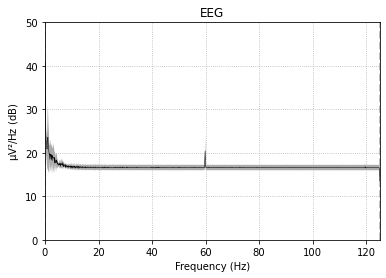

Creating RawArray with float64 data, n_channels=8, n_times=32466
    Range : 0 ... 32465 =      0.000 ...   129.860 secs
Ready.
Effective window size : 8.192 (s)


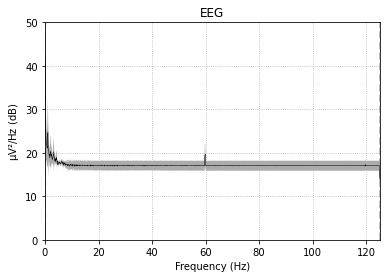

Creating RawArray with float64 data, n_channels=8, n_times=32466
    Range : 0 ... 32465 =      0.000 ...   129.860 secs
Ready.
Effective window size : 8.192 (s)


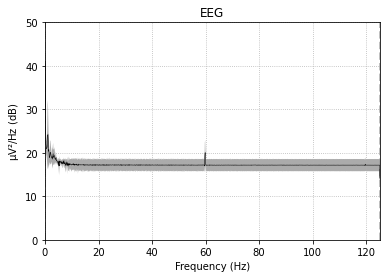

Creating RawArray with float64 data, n_channels=8, n_times=32371
    Range : 0 ... 32370 =      0.000 ...   129.480 secs
Ready.
Effective window size : 8.192 (s)


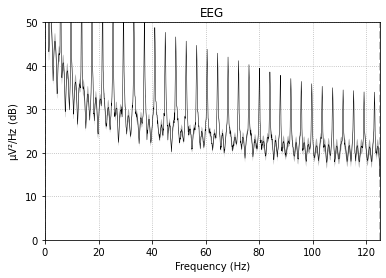

Creating RawArray with float64 data, n_channels=8, n_times=32468
    Range : 0 ... 32467 =      0.000 ...   129.868 secs
Ready.
Effective window size : 8.192 (s)


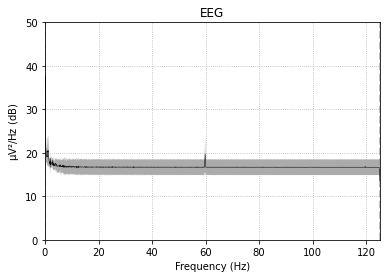

Creating RawArray with float64 data, n_channels=8, n_times=32467
    Range : 0 ... 32466 =      0.000 ...   129.864 secs
Ready.
Effective window size : 8.192 (s)


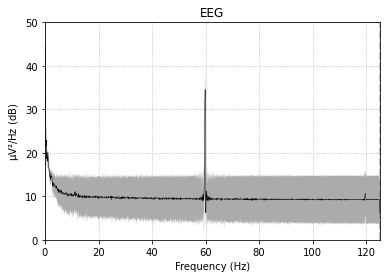

Creating RawArray with float64 data, n_channels=8, n_times=32382
    Range : 0 ... 32381 =      0.000 ...   129.524 secs
Ready.
Effective window size : 8.192 (s)


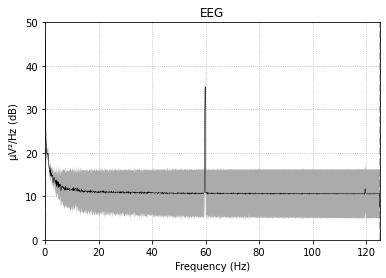

Creating RawArray with float64 data, n_channels=8, n_times=32467
    Range : 0 ... 32466 =      0.000 ...   129.864 secs
Ready.
Effective window size : 8.192 (s)


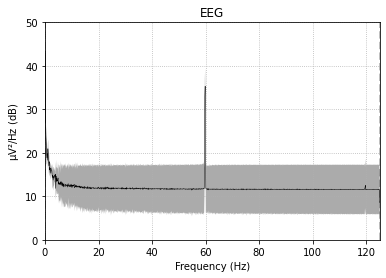

Creating RawArray with float64 data, n_channels=8, n_times=32467
    Range : 0 ... 32466 =      0.000 ...   129.864 secs
Ready.
Effective window size : 8.192 (s)


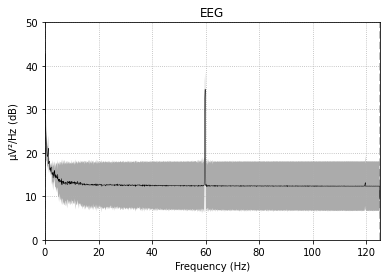

Creating RawArray with float64 data, n_channels=8, n_times=32468
    Range : 0 ... 32467 =      0.000 ...   129.868 secs
Ready.
Effective window size : 8.192 (s)


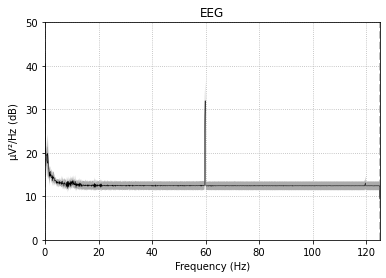

Creating RawArray with float64 data, n_channels=8, n_times=32347
    Range : 0 ... 32346 =      0.000 ...   129.384 secs
Ready.
Effective window size : 8.192 (s)


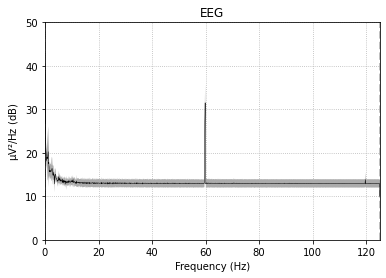

Creating RawArray with float64 data, n_channels=8, n_times=32346
    Range : 0 ... 32345 =      0.000 ...   129.380 secs
Ready.
Effective window size : 8.192 (s)


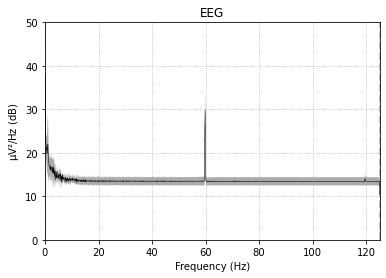

Creating RawArray with float64 data, n_channels=8, n_times=32133
    Range : 0 ... 32132 =      0.000 ...   128.528 secs
Ready.
Effective window size : 8.192 (s)


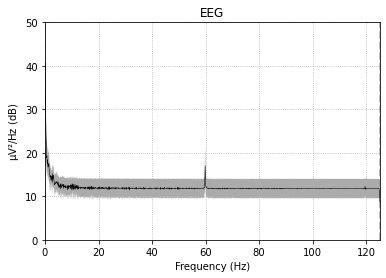

Creating RawArray with float64 data, n_channels=8, n_times=32305
    Range : 0 ... 32304 =      0.000 ...   129.216 secs
Ready.
Effective window size : 8.192 (s)


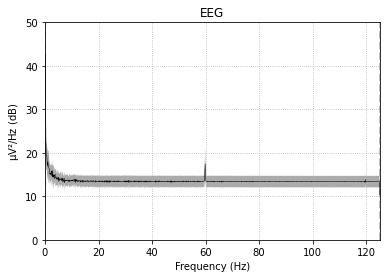

Creating RawArray with float64 data, n_channels=8, n_times=32466
    Range : 0 ... 32465 =      0.000 ...   129.860 secs
Ready.
Effective window size : 8.192 (s)


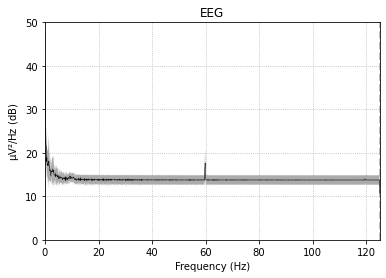

Creating RawArray with float64 data, n_channels=8, n_times=32467
    Range : 0 ... 32466 =      0.000 ...   129.864 secs
Ready.
Effective window size : 8.192 (s)


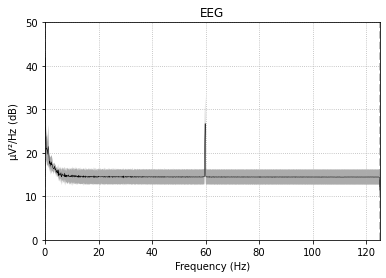

Creating RawArray with float64 data, n_channels=8, n_times=32346
    Range : 0 ... 32345 =      0.000 ...   129.380 secs
Ready.
Effective window size : 8.192 (s)


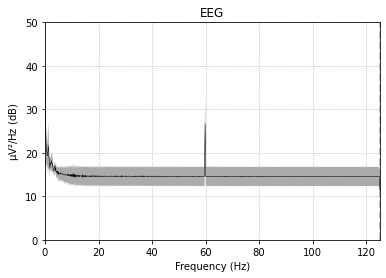

Creating RawArray with float64 data, n_channels=8, n_times=32417
    Range : 0 ... 32416 =      0.000 ...   129.664 secs
Ready.
Effective window size : 8.192 (s)


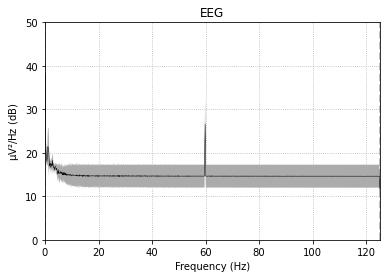

Creating RawArray with float64 data, n_channels=8, n_times=32346
    Range : 0 ... 32345 =      0.000 ...   129.380 secs
Ready.
Effective window size : 8.192 (s)


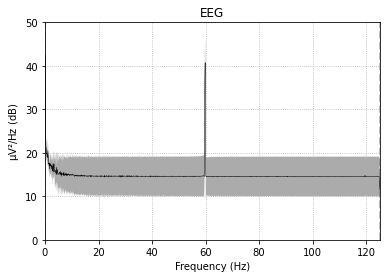

Creating RawArray with float64 data, n_channels=8, n_times=32346
    Range : 0 ... 32345 =      0.000 ...   129.380 secs
Ready.
Effective window size : 8.192 (s)


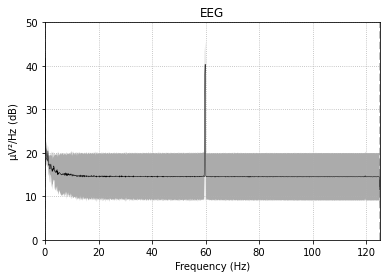

Creating RawArray with float64 data, n_channels=8, n_times=32257
    Range : 0 ... 32256 =      0.000 ...   129.024 secs
Ready.
Effective window size : 8.192 (s)


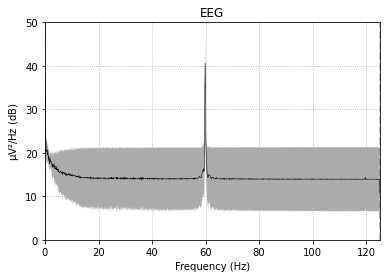

Creating RawArray with float64 data, n_channels=8, n_times=32436
    Range : 0 ... 32435 =      0.000 ...   129.740 secs
Ready.
Effective window size : 8.192 (s)


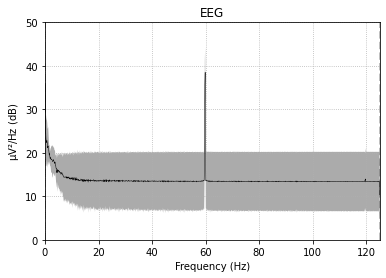

Creating RawArray with float64 data, n_channels=8, n_times=32325
    Range : 0 ... 32324 =      0.000 ...   129.296 secs
Ready.
Effective window size : 8.192 (s)


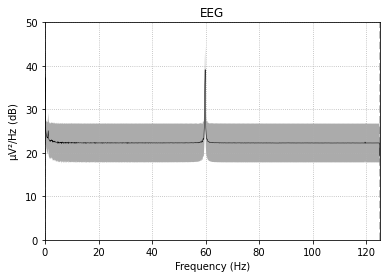

Creating RawArray with float64 data, n_channels=8, n_times=32466
    Range : 0 ... 32465 =      0.000 ...   129.860 secs
Ready.
Effective window size : 8.192 (s)


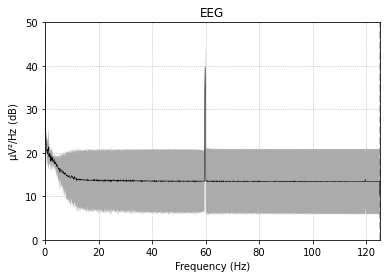

Creating RawArray with float64 data, n_channels=8, n_times=32376
    Range : 0 ... 32375 =      0.000 ...   129.500 secs
Ready.
Effective window size : 8.192 (s)


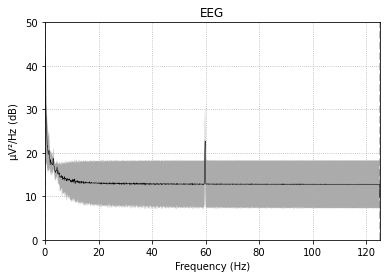

Creating RawArray with float64 data, n_channels=8, n_times=32466
    Range : 0 ... 32465 =      0.000 ...   129.860 secs
Ready.
Effective window size : 8.192 (s)


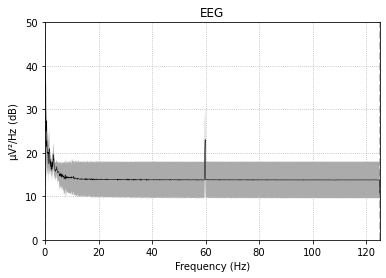

Creating RawArray with float64 data, n_channels=8, n_times=32436
    Range : 0 ... 32435 =      0.000 ...   129.740 secs
Ready.
Effective window size : 8.192 (s)


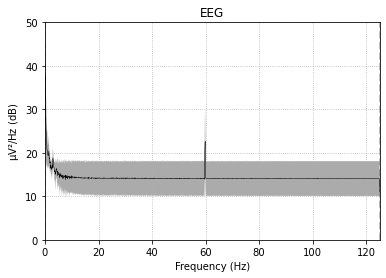

Creating RawArray with float64 data, n_channels=8, n_times=31984
    Range : 0 ... 31983 =      0.000 ...   127.932 secs
Ready.
Effective window size : 8.192 (s)


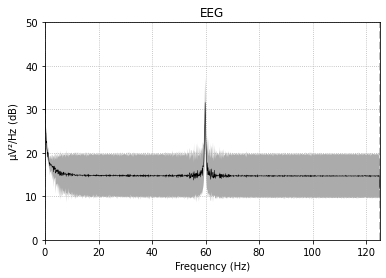

Creating RawArray with float64 data, n_channels=8, n_times=32452
    Range : 0 ... 32451 =      0.000 ...   129.804 secs
Ready.
Effective window size : 8.192 (s)


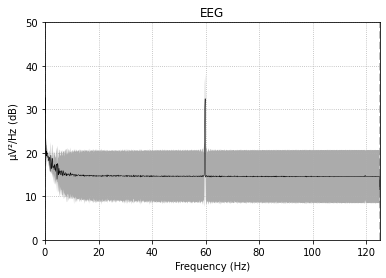

Creating RawArray with float64 data, n_channels=8, n_times=32219
    Range : 0 ... 32218 =      0.000 ...   128.872 secs
Ready.
Effective window size : 8.192 (s)


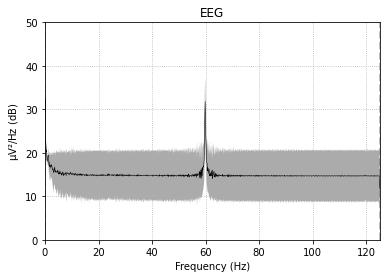

Creating RawArray with float64 data, n_channels=8, n_times=32326
    Range : 0 ... 32325 =      0.000 ...   129.300 secs
Ready.
Effective window size : 8.192 (s)


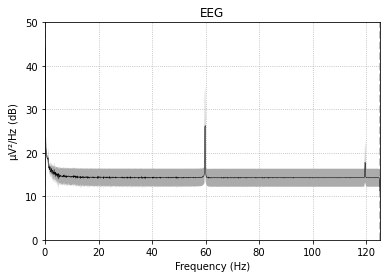

Creating RawArray with float64 data, n_channels=8, n_times=32346
    Range : 0 ... 32345 =      0.000 ...   129.380 secs
Ready.
Effective window size : 8.192 (s)


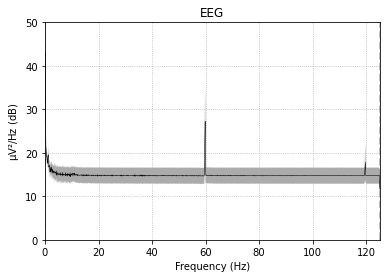

Creating RawArray with float64 data, n_channels=8, n_times=32346
    Range : 0 ... 32345 =      0.000 ...   129.380 secs
Ready.
Effective window size : 8.192 (s)


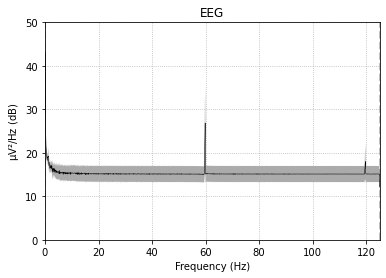

Creating RawArray with float64 data, n_channels=8, n_times=32466
    Range : 0 ... 32465 =      0.000 ...   129.860 secs
Ready.
Effective window size : 8.192 (s)


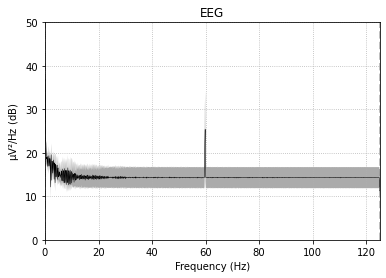

Creating RawArray with float64 data, n_channels=8, n_times=32467
    Range : 0 ... 32466 =      0.000 ...   129.864 secs
Ready.
Effective window size : 8.192 (s)


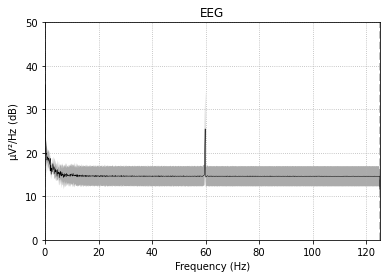

Creating RawArray with float64 data, n_channels=8, n_times=32459
    Range : 0 ... 32458 =      0.000 ...   129.832 secs
Ready.
Effective window size : 8.192 (s)


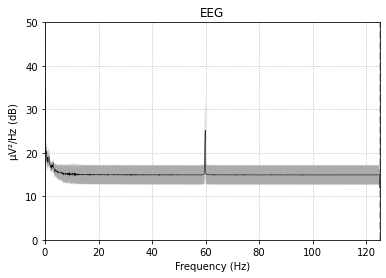

Creating RawArray with float64 data, n_channels=8, n_times=32345
    Range : 0 ... 32344 =      0.000 ...   129.376 secs
Ready.
Effective window size : 8.192 (s)


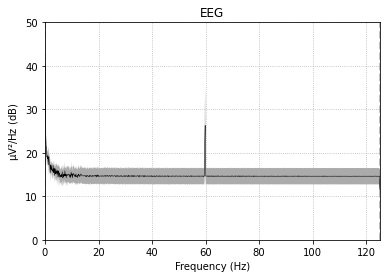

Creating RawArray with float64 data, n_channels=8, n_times=32346
    Range : 0 ... 32345 =      0.000 ...   129.380 secs
Ready.
Effective window size : 8.192 (s)


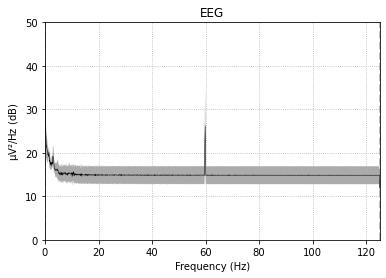

Creating RawArray with float64 data, n_channels=8, n_times=32377
    Range : 0 ... 32376 =      0.000 ...   129.504 secs
Ready.
Effective window size : 8.192 (s)


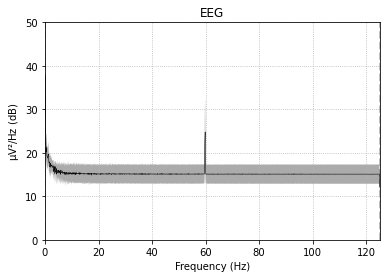

Creating RawArray with float64 data, n_channels=8, n_times=32466
    Range : 0 ... 32465 =      0.000 ...   129.860 secs
Ready.
Effective window size : 8.192 (s)


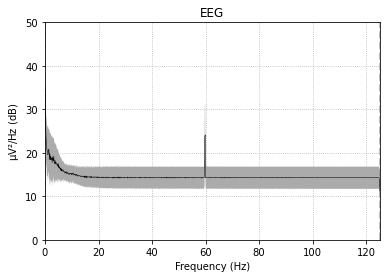

Creating RawArray with float64 data, n_channels=8, n_times=32466
    Range : 0 ... 32465 =      0.000 ...   129.860 secs
Ready.
Effective window size : 8.192 (s)


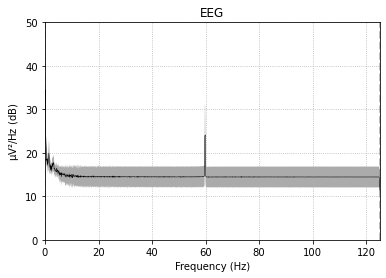

Creating RawArray with float64 data, n_channels=8, n_times=32406
    Range : 0 ... 32405 =      0.000 ...   129.620 secs
Ready.
Effective window size : 8.192 (s)


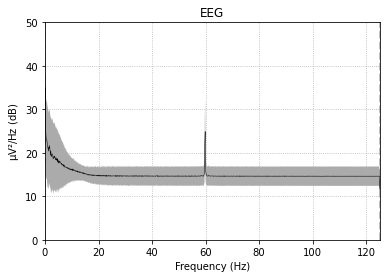

In [6]:
for file in files:
    generate_psd_plot(file)